<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение библиотек</a></span></li><li><span><a href="#Загрузка-и-обзор" data-toc-modified-id="Загрузка-и-обзор-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и обзор</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Предобработка</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание" data-toc-modified-id="Взвешивание-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Деревья" data-toc-modified-id="Деревья-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Деревья</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия,-веса" data-toc-modified-id="Логистическая-регрессия,-веса-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Логистическая регрессия, веса</a></span></li><li><span><a href="#Логистическая-регрессия,-upsampling" data-toc-modified-id="Логистическая-регрессия,-upsampling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Логистическая регрессия, upsampling</a></span></li><li><span><a href="#Логистическая-регрессия,-downsampling" data-toc-modified-id="Логистическая-регрессия,-downsampling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Логистическая регрессия, downsampling</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

### Подключение библиотек

In [ ]:
!pip install -qU category_encoders seaborn scikit-learn pandas

In [2]:
import warnings
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.dummy import DummyClassifier
from category_encoders import BinaryEncoder, OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Settings
warnings.filterwarnings(action='ignore')
sns.set_theme(context="talk", rc={'figure.figsize':(8,6)})
pd.set_option('display.max_columns', None)

### Загрузка и обзор

In [4]:
churn = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber')
churn = churn.reset_index(drop=True)
print('Количество строк: {} столбцов: {}'.format(*churn.shape))
churn.sample(n=10, random_state=12345)

Количество строк: 10000 столбцов: 13


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7867,15697201,Yocum,640,Spain,Female,46,3.0,0.00,1,1,1,156260.08,0
1402,15613282,Vorobyova,757,France,Male,29,8.0,130306.49,1,1,0,77469.38,0
8606,15694581,Rawlings,807,Spain,Male,42,5.0,0.00,2,1,1,74900.90,0
8885,15815125,Michael,668,Spain,Male,45,4.0,102486.21,2,1,1,158379.25,0
6494,15752846,Pinto,699,France,Male,28,7.0,0.00,2,1,1,22684.78,0
9628,15596624,Topp,662,France,Female,22,9.0,0.00,2,1,1,44377.65,0
7459,15583724,Raymond,645,Spain,Female,29,4.0,0.00,2,1,1,74346.11,0
3964,15714981,Sabbatini,476,France,Male,37,4.0,0.00,1,1,1,55775.84,1
7000,15739548,Johnson,775,France,Male,28,9.0,111167.70,1,1,0,149331.01,0
4470,15593795,Linton,516,Germany,Female,53,NaN,156674.20,1,1,0,118502.34,1


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [6]:
churn.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
print("Частоты фамилий:")
churn['Surname'].value_counts().head(10)

Частоты фамилий:


Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Name: Surname, dtype: int64

В данных встречаются люди с одинаковыми фамилиями.

In [9]:
print("Количество идентификаторов, имеющих дубликаты: {}".format((churn['CustomerId'].value_counts() > 1).sum()))

Количество идентификаторов, имеющих дубликаты: 0


Все идентификаторы уникальны. Каждый клиент в одной строке.

In [10]:
churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Группы клиентов из ранзых регионов имеют различную численность. 
Имеется дисбаланс групп по регионам.

In [11]:
churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Можно считать, что группы клиентов по половой принадлежности сбалансированны.

Посмотрим на гистограммы некоторых признаков, исключая те у которые принимают всего пару значений и фамилии с идентификаторами.

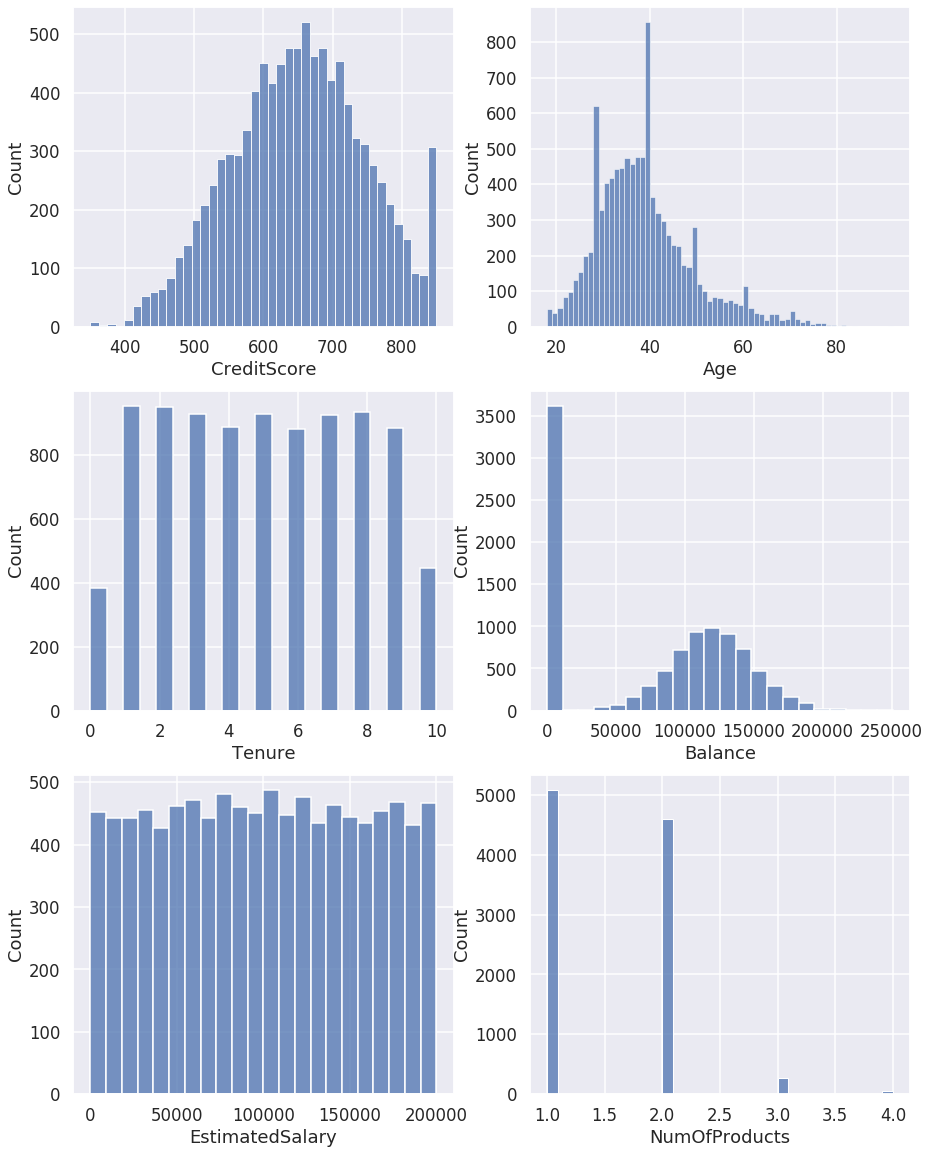

In [12]:
f, axes = plt.subplots(3,2, figsize=(15,20))
cols_iter = churn[['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']].iteritems()
for ax in axes.reshape(-1):
    col_name, col_data = next(cols_iter)
    ax.set_title=col_name
    sns.histplot(col_data, ax=ax)

- 'Tenure', 'EstimatedSalary' - распределены почти равномерно
- 'Balance' - средства на балансе у клиентов имеют нормальное распределение, но есть клиенты с нулевым балансом (счет завели, но еще не пополнили)
- 'CreditScore', 'Age'- распределены номально, без скошенности.
- 'NumOfProducts' - большинство клиентов используют один или два продукта

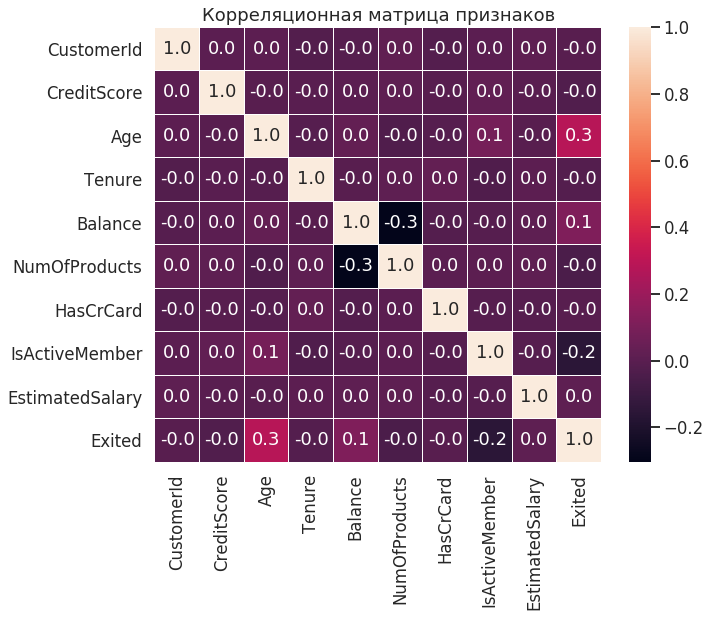

In [13]:
ax = sns.heatmap(churn.corr(), annot=True, fmt='.1f', linewidth=.1)
ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
_ = ax.set_title('Корреляционная матрица признаков')

Есть очень слабая корреляция между признаками 'Age' и 'Exited', 'NumOfProducts' и 'Balance'. Сильно скоррелированных признаков не наблюдается.

### Выводы

- Имеется дисбаланс групп по регионам.
- Каждый отдельный клиент представлен единственной записью. При чем признаки id и surname нужно исключить из обучения. Т.к. идентификаторы имеют искусственную природу, а наша задача - приблизить модель к реальности; а если оставить фамилии, то модель может, например, обратить внимание на частоту встречаемости популярных фамилий и стать предвзятой. Ну и нам, все таки, интересней оценивать именно поведение клиента.
>- Здравствуйте уважаемый! Какая у вас фамилия?
>- Smith
>- Извините. Со Смитами не работаем.
- Имеются пропуски, порядка 10%, в колонке tenure (сколько лет человек является клиентом банка). Медиана и среднее практически совпадают. Можно заполнить пропуски любым на выбор. Либо модой.
- hascrcard говорит, что 70.55% клиентов имеют кредитные карточки (т.к. признак бинарный, этот процент опредеяется средним).
- Распределение numofproducts скошено влево (медиана < среднего). Т.е. большая часть клиентов пользуется одним двумя банковскими продуктами.
- Ативных клиентов 50%.
- Ушедших клинтов 20%. Что означает дисбаланс классов (зависимого признака). 
- Age: т.к. медиана и среднее практически равны - распределение можно считать не скошенным, но имеются выбросы Q3 + 1.5*(Q3-Q1) = 44 + 18 = 52 < 92 = max.
- Признаки имеют разный масштаб значений. Перед обучением нужно нормализовать данные
- В качестве категориальных можно выделить признаки: 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography', 'Gender'.
- Есть очень слабая корреляция между признаками 'Age' и 'Exited', 'NumOfProducts' и 'Balance'. Сильно скоррелированных признаков не наблюдается.

## Исследование задачи

### Предобработка

Заменим пропуски в tenure модой

In [14]:
tenure_mode = churn['Tenure'].mode().iat[0]
print('Наиболее популярное значение tenure:', tenure_mode)
churn['Tenure'] = churn['Tenure'].fillna(value=tenure_mode, downcast='infer')

Наиболее популярное значение tenure: 1.0


Итак в данных имеется дисбаланс классов. Посмотрим как ведут себя модели без учета дисбаланса.
Учитывая выводы предыдущего раздела, перед обучением признаки данных разделим на сильных и независимых и зависимых, закодируем категориальные признаки и нормализуем значения. CustomerId и Surname исключим при обучении модели.

Удалим колонки 'CustomerId', 'Surname'.

In [15]:
churn = churn.drop(columns=['CustomerId', 'Surname'])

Закодируем признак 'Gender' с помощью бинарного кодирования, а признаки 'NumOfProducts', 'Geography' - OHE. 
Удалим первые колонки признаков 'Geography', 'NumOfProducts', полученные после OHE кодировки, чтобы не попасть в dummy-ловушку.

In [16]:
encoder = make_pipeline(
    OrdinalEncoder(mapping=[{'col':'Gender', 'mapping':{'Male':1, 'Female':0}}]),
    OneHotEncoder(cols=['Geography', 'NumOfProducts']),
)

In [17]:
churn = encoder.fit_transform(churn)
churn = churn.drop(columns=['Geography_1', 'NumOfProducts_1'])

In [18]:
print("Посмотрим сколько и какие колонки получились:", end='\n\n')
for i, col in enumerate(churn.columns):
    print("{:2}. {}".format(i, col))

Посмотрим сколько и какие колонки получились:

 0. CreditScore
 1. Geography_2
 2. Geography_3
 3. Gender
 4. Age
 5. Tenure
 6. Balance
 7. NumOfProducts_2
 8. NumOfProducts_3
 9. NumOfProducts_4
10. HasCrCard
11. IsActiveMember
12. EstimatedSalary
13. Exited


Выделим из данных независмые признаки и зависимый.

In [19]:
# features, target = np.split(ary=churn, indices_or_sections=[len(churn.columns)-1], axis=1)

In [20]:
features = churn.drop(['Exited'],axis=1)
target = churn['Exited']

Выделим обучающую, валидационную и тестовую выборки.

In [21]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target,
    train_size=.8,
    test_size=.2, 
    stratify=target, 
    random_state=12345
)

In [22]:
# valid_idx = target.index.difference(
#     pd.concat([target_train, target_test]).index
# )
# features_valid, target_valid = features.loc[valid_idx], target.loc[valid_idx]

features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test,
    train_size=.5,
    stratify=target_test, 
    random_state=12345
)

In [23]:
print("""\
Размер features_train: {}
Размер target_train: {}
Доли классов train: {:.0%}, {:.0%}

Размер features_valid: {}
Размер target_valid: {}
Доли классов valid: {:.0%}, {:.0%}

Размер features_test: {}
Размер target_test: {}
Доли классов test: {:.0%}, {:.0%}
""".format(
        features_train.shape,
        target_train.shape,
        *(target_train.value_counts() / target_train.size),
    
        features_valid.shape,
        target_valid.shape,
        *(target_valid.value_counts() / target_valid.size),
    
        features_test.shape,
        target_test.shape,
        *(target_test.value_counts() / target_test.size),
    )
)

Размер features_train: (8000, 13)
Размер target_train: (8000,)
Доли классов train: 80%, 20%

Размер features_valid: (1000, 13)
Размер target_valid: (1000,)
Доли классов valid: 80%, 20%

Размер features_test: (1000, 13)
Размер target_test: (1000,)
Доли классов test: 80%, 20%



### Обучение

В качестве классификатора попробуем обучить логистическую регрессию. Организуем нормализацию и классификацию в технологическую цепочку для удобства.

In [24]:
model = Pipeline([('scaler', StandardScaler()), 
                  ('lr', LogisticRegression(solver='liblinear'))])

gs_lr = GridSearchCV(
    estimator=model,
    param_grid={
        'lr__C': np.arange(.1, 1.1, .1)
    },
    scoring='f1',
    cv=StratifiedKFold(shuffle=True, random_state=12345)
)

Напишем вспомогательную функцию для обзора результатов.

In [25]:
def print_gs_summary(model, X=None, y=None, metric='f1'):
    
    if (X is not None) and (y is not None):
        print('Выборка задана.')
        print('Метрика {!r}: {:.3f}'.format(
            str(metric), 
            f1_score(y,model.predict(X))
        ))
        print("Метрика 'AUC': {:.2f}".format(roc_auc_score(y, model.predict(X))))
    elif hasattr(model, 'best_score_'):
        print("Метрика 'accuracy': {:.2%}".format(str(metric), model.best_score_))
        
        
    if hasattr(model, 'best_params_'):
        print('Лучшие параметры модели')
        for k, v in model.best_params_.items():
            if '__' in k:
                print('    {}: {}'.format(k.split('__')[-1], v))
            else:
                print('    {}: {}'.format(k, v))

def draw_confusion_matrix(model, X, y):
        ax = sns.heatmap(
            confusion_matrix(y, model.predict(X)), 
            annot=True, 
            fmt='d',
        )
        ax.set_title("Матрица ошибок (Confusion matrix)")
        ax.set_xlabel("Суровая реальность порожденная моделью")
        ax.set_ylabel("Ожадания")

Выборка задана.
Метрика 'f1': 0.487
Метрика 'AUC': 0.67
Лучшие параметры модели
    C: 0.8


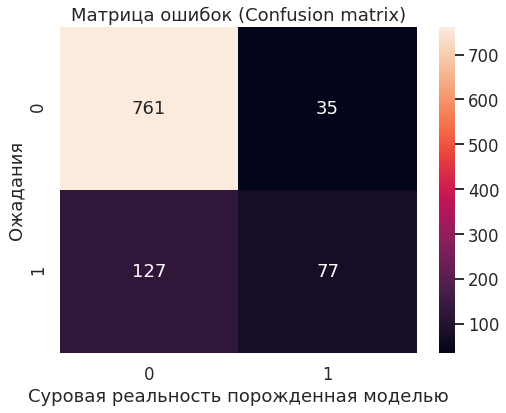

In [26]:
gs_lr.fit(features_train, target_train)
print_gs_summary(gs_lr, features_valid, target_valid)
draw_confusion_matrix(gs_lr, features_valid, target_valid)

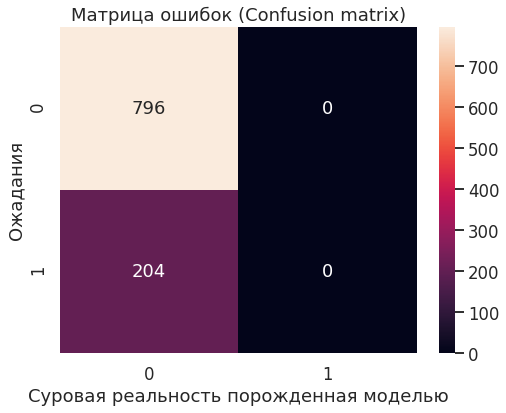

In [27]:
dummy_model = make_pipeline(StandardScaler(), DummyClassifier(strategy='most_frequent', random_state=12345))
dummy_model.fit(features_train, target_train)

draw_confusion_matrix(dummy_model, features_valid, target_valid)

### Выводы

- Полученная модель на основе логистической регрессии достигла показателя 0.49 метрики f1, AUC = 0.67. Хотя наша модель лучше dummy_most_frequent, у которой метрика f1 равна нулю, паказатель качества еще не удовлетворяет требованиям. Сказывается дисбаланс классов.
- Далее применим несколько техник для борьбы с дисбалансом

## Борьба с дисбалансом

In [28]:
def upsample(lables, frac, random_state=12345):
    indices = pd.concat([
            lables.loc[lables == 0],
            lables.loc[lables == 1].sample(frac=frac, replace=True, random_state=random_state)
        ]).index
        
    return shuffle(indices, random_state=random_state)

def downsamlpe(lables, frac, random_state=12345):
    indices = pd.concat([
            lables.loc[lables == 0].sample(frac=frac, random_state=random_state),
            lables.loc[lables == 1]
        ]).index
        
    return shuffle(indices, random_state=random_state)

        

### Взвешивание

Попробуем придать малочисленному классу больший вес и проверим результаты на валидационной выборке.

Выборка задана.
Метрика 'f1': 0.588
Метрика 'AUC': 0.78
Лучшие параметры модели
    C: 0.4
    class_weight: balanced


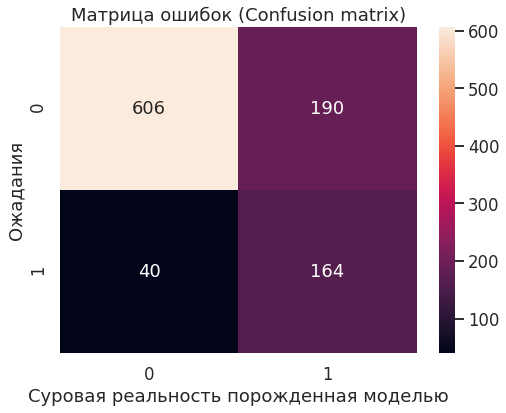

In [29]:
gs_lr.param_grid.update({'lr__class_weight': [None, 'balanced']})
gs_lr.fit(features_train, target_train)
print_gs_summary(gs_lr, features_valid, target_valid)
draw_confusion_matrix(gs_lr, features_valid, target_valid)

In [30]:
lr_weighted = gs_lr.best_estimator_

Показатель метрики f1 логистической регрессии на взвешенных классах составил 0.588, AUC=0.78. Модель улучшила результат на 0.101. Уже лучше, но еще немного не хватает.

### Upsampling

Попробуем увеличивать малочисленный класс, случайно дублируя его объекты. Уберем взвешивание классов.

In [31]:
_ = gs_lr.param_grid.pop('lr__class_weight', None)

In [32]:
lr_upsampling = None
valid_score = 0

# Downsampling dataset by removing data fraction
# iterate through multiple values of frac to find the best one
for frac in [1.2, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]:
    # get sample indices
    sample_idx = upsample(target_train, frac)
    
    gs_lr.fit(
        features_train.loc[sample_idx], 
        target_train.loc[sample_idx]
    )
    
    # save best estimator
    cur_score = gs_lr.score(features_valid, target_valid)
    if valid_score < cur_score:
        valid_score = cur_score
        lr_upsampling = gs_lr.best_estimator_
    
    
    print("Малочисленный класс увеличен в {} раза".format(frac))
    print_gs_summary(gs_lr, features_valid, target_valid)
    

Малочисленный класс увеличен в 1.2 раза
Выборка задана.
Метрика 'f1': 0.524
Метрика 'AUC': 0.69
Лучшие параметры модели
    C: 0.8
Малочисленный класс увеличен в 1.5 раза
Выборка задана.
Метрика 'f1': 0.546
Метрика 'AUC': 0.71
Лучшие параметры модели
    C: 0.2
Малочисленный класс увеличен в 2 раза
Выборка задана.
Метрика 'f1': 0.569
Метрика 'AUC': 0.73
Лучшие параметры модели
    C: 0.5
Малочисленный класс увеличен в 2.5 раза
Выборка задана.
Метрика 'f1': 0.575
Метрика 'AUC': 0.75
Лучшие параметры модели
    C: 0.30000000000000004
Малочисленный класс увеличен в 3 раза
Выборка задана.
Метрика 'f1': 0.589
Метрика 'AUC': 0.77
Лучшие параметры модели
    C: 0.4
Малочисленный класс увеличен в 3.5 раза
Выборка задана.
Метрика 'f1': 0.584
Метрика 'AUC': 0.77
Лучшие параметры модели
    C: 0.1
Малочисленный класс увеличен в 4 раза
Выборка задана.
Метрика 'f1': 0.586
Метрика 'AUC': 0.78
Лучшие параметры модели
    C: 0.1
Малочисленный класс увеличен в 4.5 раза
Выборка задана.
Метрика 'f1': 0.5

Лучший показатель метрики f1 логистической регрессии на валидационной выборке с применением техники upsampling  составил 0.589, AUC=0.77. Ну почти...

### Downsampling

Попробуем удалить некоторые объекты большего класса.

In [33]:
lr_downsampling = None
valid_score = 0

# Downsampling dataset by removing data fraction
# iterate through multiple values of frac to find the best one
for frac in np.arange(1, 0, -.1):
    # get sample indices
    sample_idx = downsamlpe(target_train, frac)
    
    gs_lr.fit(
        features_train.loc[sample_idx], 
        target_train.loc[sample_idx]
    )
    
    # save best estimator
    cur_score = gs_lr.score(features_valid, target_valid)
    if valid_score < cur_score:
        valid_score = cur_score
        lr_downsampling = gs_lr.best_estimator_
        
    print("Популярный класс уменьшен в {:.1f} раза".format(frac))
    print_gs_summary(gs_lr, features_valid, target_valid)
    

Популярный класс уменьшен в 1.0 раза
Выборка задана.
Метрика 'f1': 0.483
Метрика 'AUC': 0.66
Лучшие параметры модели
    C: 0.5
Популярный класс уменьшен в 0.9 раза
Выборка задана.
Метрика 'f1': 0.512
Метрика 'AUC': 0.68
Лучшие параметры модели
    C: 0.8
Популярный класс уменьшен в 0.8 раза
Выборка задана.
Метрика 'f1': 0.533
Метрика 'AUC': 0.69
Лучшие параметры модели
    C: 0.2
Популярный класс уменьшен в 0.7 раза
Выборка задана.
Метрика 'f1': 0.543
Метрика 'AUC': 0.70
Лучшие параметры модели
    C: 0.2
Популярный класс уменьшен в 0.6 раза
Выборка задана.
Метрика 'f1': 0.556
Метрика 'AUC': 0.72
Лучшие параметры модели
    C: 1.0
Популярный класс уменьшен в 0.5 раза
Выборка задана.
Метрика 'f1': 0.573
Метрика 'AUC': 0.73
Лучшие параметры модели
    C: 0.2
Популярный класс уменьшен в 0.4 раза
Выборка задана.
Метрика 'f1': 0.572
Метрика 'AUC': 0.74
Лучшие параметры модели
    C: 0.4
Популярный класс уменьшен в 0.3 раза
Выборка задана.
Метрика 'f1': 0.586
Метрика 'AUC': 0.77
Лучшие пара

Лучший показатель метрики f1 логистической регрессии на валидационной выборке с применением техники downsampling составил 0.586, AUC=0.77.

### Деревья

Попробуем обучить случайный лес.

In [34]:
forest = Pipeline([('scaler', StandardScaler()), 
                  ('rfc', RandomForestClassifier())])

gs_forest = GridSearchCV(
    estimator=forest,
    param_grid={
        'rfc__n_estimators': [10, 50, 100],
        'rfc__max_depth': [5, 15, 20],
        'rfc__min_samples_split': [2, 4, 8],
        'rfc__class_weight': [None, 'balanced', 'balanced_subsample'],
        'rfc__random_state': [12345]
    },
    scoring='f1',
    cv=StratifiedKFold(shuffle=True, random_state=12345)
)

Выборка задана.
Метрика 'f1': 0.656
Метрика 'AUC': 0.77
Лучшие параметры модели
    class_weight: balanced_subsample
    max_depth: 20
    min_samples_split: 8
    n_estimators: 100
    random_state: 12345


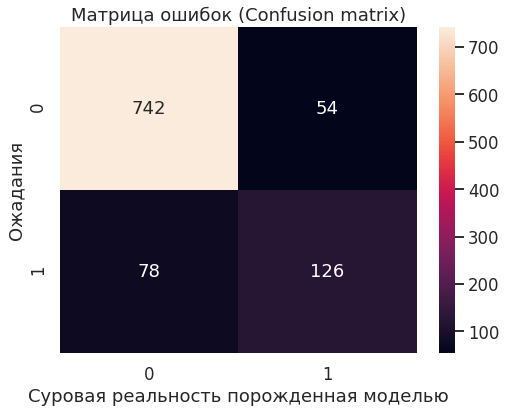

In [35]:
gs_forest.fit(features_train, target_train)
print_gs_summary(gs_forest, features_valid, target_valid)
draw_confusion_matrix(gs_forest, features_valid, target_valid)

Показатель метрики f1 случайного леса на валидационной выборке составил 0.62. Победа? Проверим на тестовой выборке.

### Выводы

- Показатель метрики f1 логистической регрессии на взвешенных классах составил 0.588, AUC=0.78
- Лучший показатель метрики f1 логистической регрессии на валидационной выборке с применением техники upsampling составил 0.589, AUC=0.77.
- Лучший показатель метрики f1 логистической регрессии на валидационной выборке с применением техники downsampling составил 0.586, AUC=0.77.
- Показатель метрики f1 случайного леса на валидационной выборке составил 0.656, AUC = 0.77.

## Тестирование модели

In [36]:
def plot_roc(model, X, y, title=''):
    fpr, tpr, threshold = roc_curve(y, model.predict_proba(X)[:, 1])
    ax = sns.lineplot(y=tpr, x=fpr)
    x = [0.0, 1.0]
    ax.plot(x, x, linestyle='dashed')
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_title(title)

### Логистическая регрессия, веса

Выборка задана.
Метрика 'f1': 0.549
Метрика 'AUC': 0.75


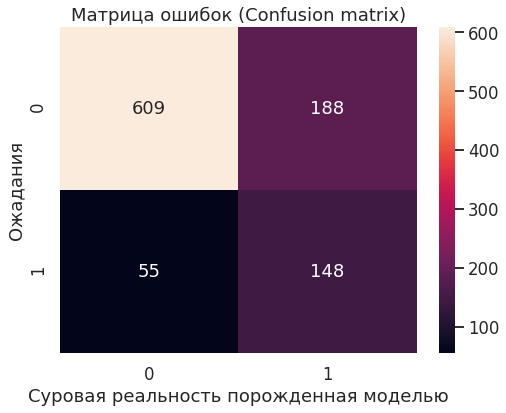

In [37]:
print_gs_summary(lr_weighted, features_test, target_test)
draw_confusion_matrix(lr_weighted, features_test, target_test)

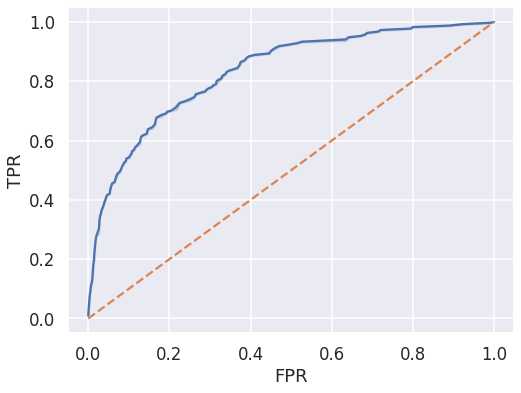

In [38]:
plot_roc(lr_weighted, features_test, target_test)

### Логистическая регрессия, upsampling

Выборка задана.
Метрика 'f1': 0.576
Метрика 'AUC': 0.75


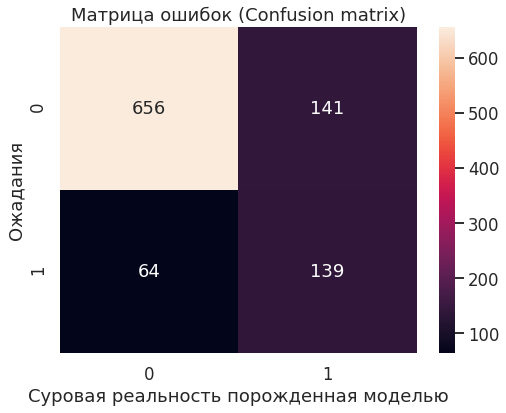

In [39]:
print_gs_summary(lr_upsampling, features_test, target_test)
draw_confusion_matrix(lr_upsampling, features_test, target_test)

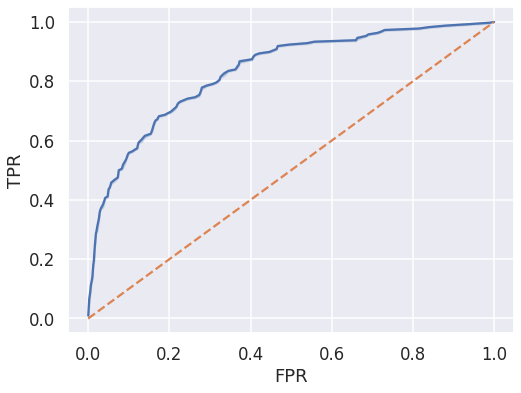

In [40]:
plot_roc(lr_upsampling, features_test, target_test)

### Логистическая регрессия, downsampling

Выборка задана.
Метрика 'f1': 0.563
Метрика 'AUC': 0.75


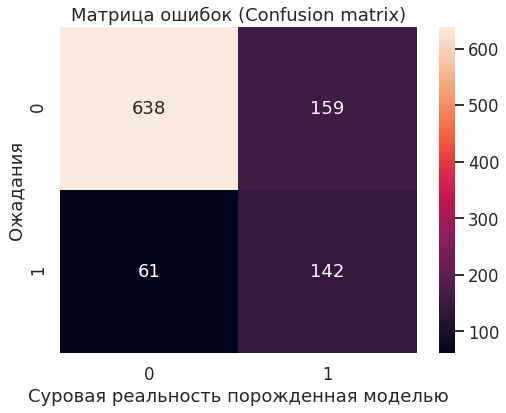

In [41]:
print_gs_summary(lr_downsampling, features_test, target_test)
draw_confusion_matrix(lr_downsampling, features_test, target_test)

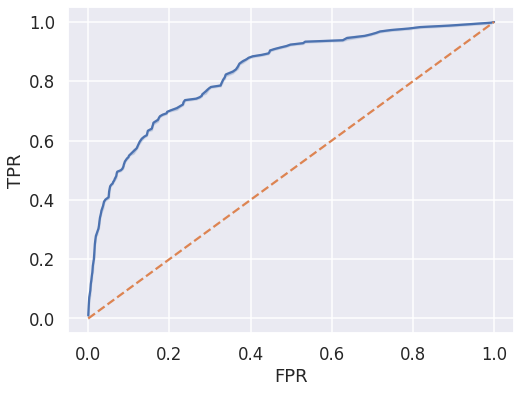

In [42]:
plot_roc(lr_downsampling, features_test, target_test)

### Случайный лес

Выборка задана.
Метрика 'f1': 0.602
Метрика 'AUC': 0.74
Лучшие параметры модели
    class_weight: balanced_subsample
    max_depth: 20
    min_samples_split: 8
    n_estimators: 100
    random_state: 12345


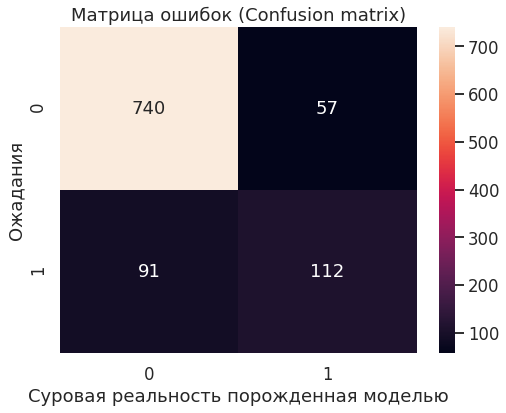

In [43]:
print_gs_summary(gs_forest, features_test, target_test)
draw_confusion_matrix(gs_forest, features_test, target_test)

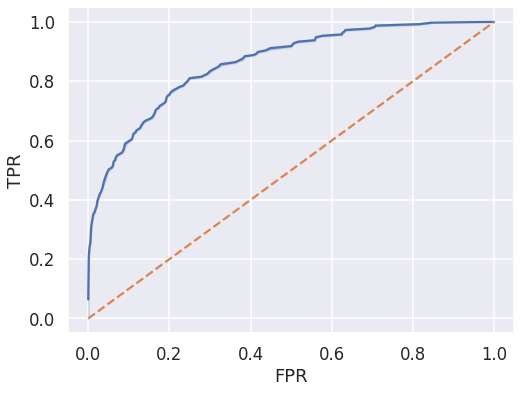

In [44]:
plot_roc(gs_forest, features_test, target_test)

### Выводы

На тестовой выборке
- Показатель метрики f1 логистической регрессии, обученной на взвешенных классах, составил 0.576, auc_roc=0.75.
- Лучший показатель метрики f1 логистической регрессии с применением техники upsampling составил 0.576, auc_roc=0.75. 
- Лучший показатель метрики f1 логистической регрессии с применением техники downsampling составил 0.563, auc_roc=0.75.
- Показатель метрики f1 случайного леса на валидационной выборке составил 0.602, auc_roc=0.74. **удовлетворяет требованиям**
- Метрики auc во всех моделях логистических регрессий приблизительно равны.
- Победителем, из тестируемых алгоритмов, объявляется случайный лес с параметрами: 
    - class_weight: balanced_subsample
    - max_depth: 15
    - min_samples_split: 8
    - n_estimators: 50